# Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Agriculture.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
#checkig data types
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [4]:
#checking null vlues
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

number_weeks_used have 442 null values

In [5]:
df["Number_Weeks_Used"].mode()

0    20.0
dtype: float64

In [6]:
#filling null values with mode
df["Number_Weeks_Used"]=df["Number_Weeks_Used"].replace(np.NaN,20)

                                                               

In [7]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [8]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,20.0,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


# Summary Statistics

In [9]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.036530,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.249436,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


- std is very high in column Estimated_insects_count 

- very huge difference b/w mean and median in column Number_Doses_Used 

CHECKING CORRELATIONS

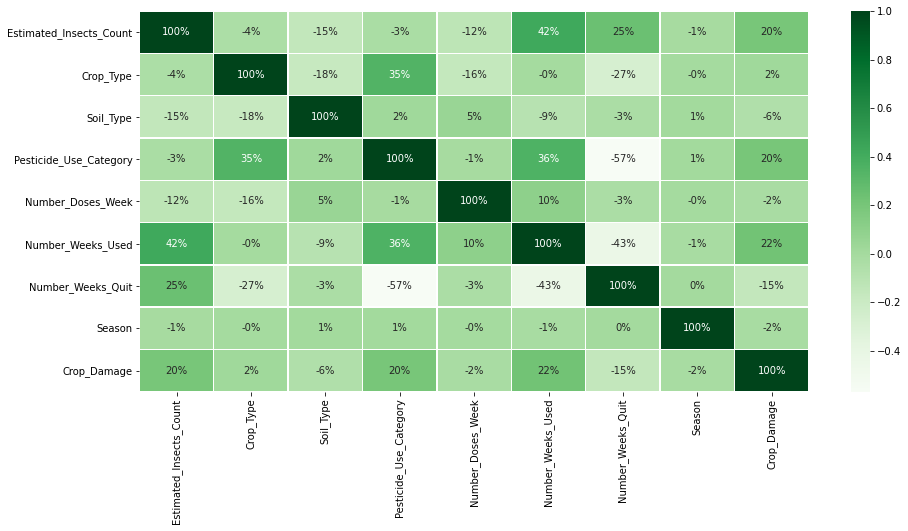

In [10]:
#PLOTING CORRELATION WITH HEATMAPE
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,fmt="0.0%",linewidth=.4,cmap="Greens")

- COLUMNS ESTIMATED_INSECTS_COUNTS,Pesticide_Use_Category AND Number_Weeks_Used HAVE MAX CORRELTION THAN OTHERS WIH TARGET COLUMN

## Analysis with visualization 

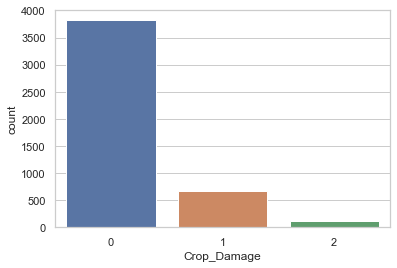

In [11]:
sns.set(style="whitegrid")
sns.countplot(df["Crop_Damage"])
plt.show()

0 have more counts than 1 and 2.

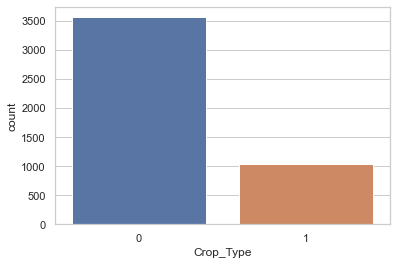

In [12]:
sns.countplot(df["Crop_Type"])

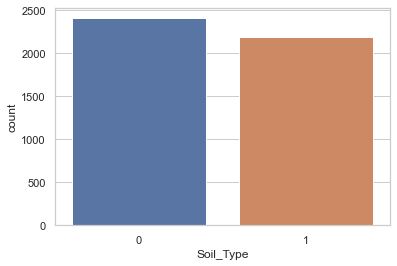

In [13]:
sns.countplot(df["Soil_Type"])

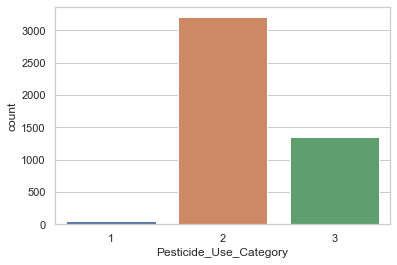

In [14]:
sns.countplot(df["Pesticide_Use_Category"])

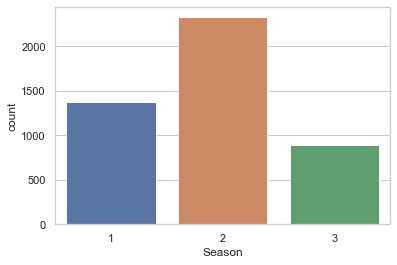

In [15]:
sns.countplot(df["Season"])

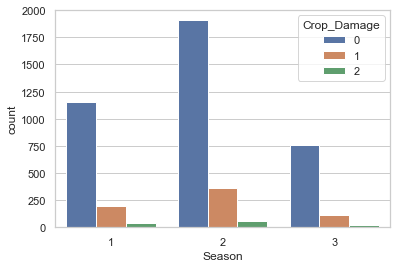

In [16]:
sns.countplot(x="Season",hue="Crop_Damage",data=df)

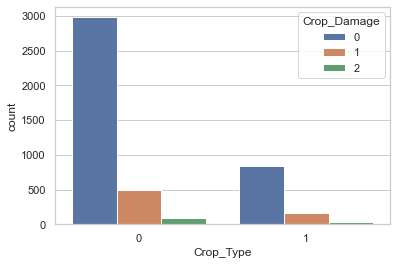

In [17]:
sns.countplot(x="Crop_Type",hue="Crop_Damage",data=df)

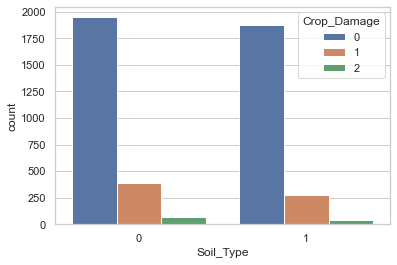

In [18]:
sns.countplot(x="Soil_Type",hue="Crop_Damage",data=df)

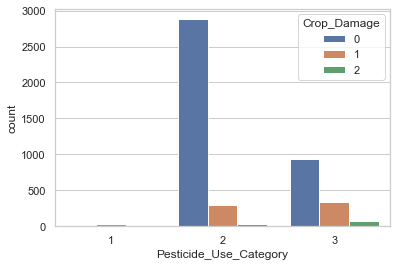

In [19]:
sns.countplot(x="Pesticide_Use_Category",hue="Crop_Damage",data=df)

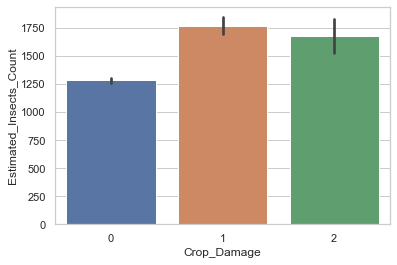

In [20]:
#Crop damage vs Estimated_Insects_Count
sns.barplot(x='Crop_Damage',y="Estimated_Insects_Count",data=df)

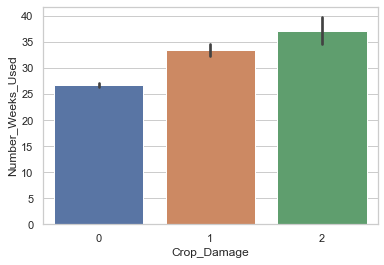

In [21]:
sns.barplot(x='Crop_Damage',y="Number_Weeks_Used",data=df)

Checking skewness

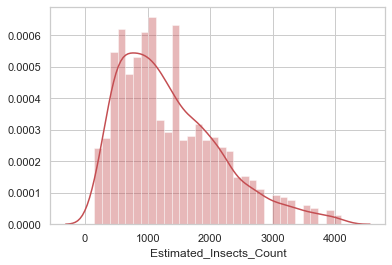

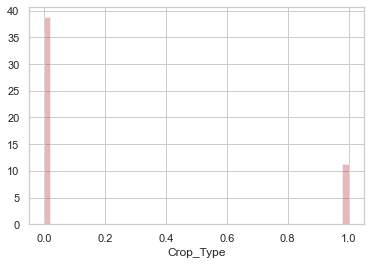

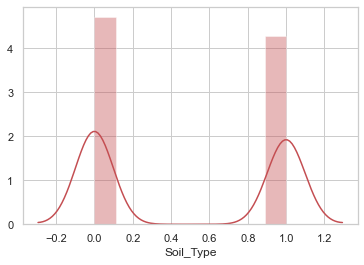

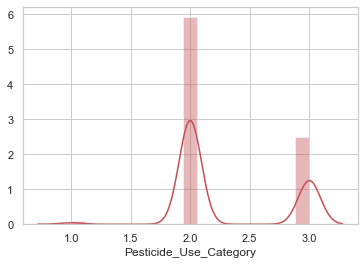

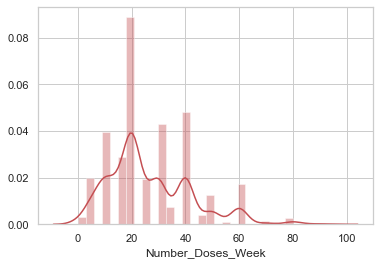

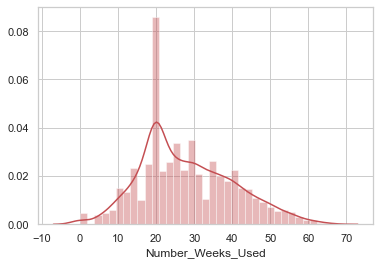

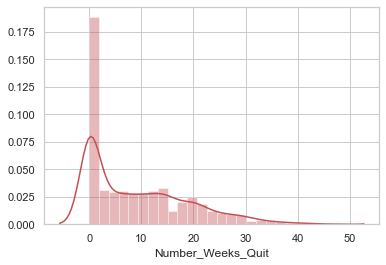

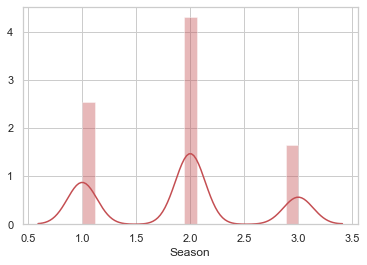

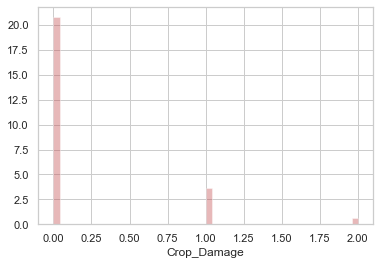

In [22]:
#ploting distibution plot
for col in df.describe().columns:
    sns.distplot(df[col],color="r")
    plt.show()
    

In [23]:
#checking skewness to all columns
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.432681
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [29]:
#handleing skwness
from scipy.stats import boxcox

for col in df.describe().columns:
    if df[col].skew()>0.55:
        df[col]=np.sqrt(df[col])
        

In [30]:
df.skew()

Estimated_Insects_Count   -0.500955
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.494443
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.432681
Number_Weeks_Quit          0.054299
Season                     0.144841
Crop_Damage                1.868685
dtype: float64

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
Crop_Damage                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

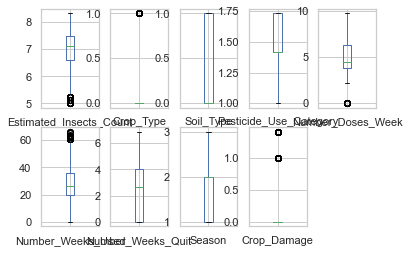

In [32]:
#ploting outliers with box plot
df.plot(kind="box",subplots=True,layout=(2,5))

In [34]:
df.drop("ID",axis=1,inplace=True)

In [35]:
#checking outliers with zscore
z=np.abs(zscore(df))
np.where(z>3)

(array([   0,    0,    1,    1,    2,    2,    3,    3,    4,    4,    5,
           5,    6,    6,    7,    7,    7,    8,    8,    9,    9,    9,
          10,   10,   11,   11,   12,   12,   13,   13,   14,   14,   14,
          15,   15,   16,   16,   17,   17,   18,   18,   19,   19,   20,
          20,   21,   21,   22,   22,   23,   23,   24,   25,   26,  103,
         112,  149,  165,  166,  167,  179,  186,  197,  207,  222,  223,
         242,  248,  264,  265,  290,  296,  305,  316,  351,  355,  361,
         374,  375,  377,  385,  386,  387,  388,  389,  390,  453,  458,
         466,  480,  510,  517,  522,  557,  595,  612,  634,  693,  819,
         944,  980, 1067, 1178, 1327, 1339, 1340, 1350, 1351, 1737, 1807,
        2043, 2139, 2170, 2171, 2195, 2237, 2571, 2571, 2572, 2572, 2573,
        2573, 2574, 2574, 2575, 2575, 2576, 2576, 2577, 2577, 2578, 2578,
        2579, 2579, 2580, 2580, 2581, 2581, 2582, 2582, 2583, 2583, 2584,
        2584, 2585, 2585, 2585, 2586, 

In [36]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4599, 9)
(4413, 9)


## Training Model 

In [42]:
X=df_new.drop("Crop_Damage",axis=1)
print(X)
y=df_new["Crop_Damage"]
print(y)

      Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
27                   5.123964        0.0          1                1.732051   
28                   5.123964        0.0          1                1.732051   
29                   5.236442        0.0          0                1.732051   
30                   5.236442        0.0          1                1.732051   
31                   5.342334        0.0          1                1.732051   
...                       ...        ...        ...                     ...   
4594                 7.667626        0.0          1                1.414214   
4595                 7.668094        0.0          1                1.414214   
4596                 7.726213        0.0          1                1.414214   
4597                 7.726213        0.0          1                1.414214   
4598                 7.726213        0.0          1                1.414214   

      Number_Doses_Week  Number_Weeks_Used  Number_

In [43]:
#using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x

array([[-2.94776311, -0.53218593,  1.04425976, ..., -1.18659984,
        -1.25770515,  0.14931764],
       [-2.94776311, -0.53218593,  1.04425976, ..., -1.102063  ,
        -1.25770515,  0.14931764],
       [-2.77327723, -0.53218593, -0.95761614, ..., -0.76391567,
        -1.25770515, -1.28627876],
       ...,
       [ 1.08907717, -0.53218593,  1.04425976, ..., -1.77835767,
         1.45063357,  0.14931764],
       [ 1.08907717, -0.53218593,  1.04425976, ..., -0.67937884,
         1.29574109,  0.14931764],
       [ 1.08907717, -0.53218593,  1.04425976, ...,  0.4196    ,
         0.89134009,  0.14931764]])

In [44]:
# creating dataFrame
x=pd.DataFrame(x,columns=X.columns)
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.947763,-0.532186,1.044260,1.593391,-0.324762,-1.186600,-1.257705,0.149318
1,-2.947763,-0.532186,1.044260,1.593391,-0.324762,-1.102063,-1.257705,0.149318
2,-2.773277,-0.532186,-0.957616,1.593391,0.034422,-0.763916,-1.257705,-1.286279
3,-2.773277,-0.532186,1.044260,1.593391,0.935713,-0.341232,-1.257705,1.584914
4,-2.609008,-0.532186,1.044260,1.593391,-0.324762,-1.693821,-1.257705,1.584914
...,...,...,...,...,...,...,...,...
4408,0.998192,-0.532186,1.044260,-0.627593,-0.324762,-0.679379,-0.736485,-1.286279
4409,0.998918,-0.532186,1.044260,-0.627593,0.359149,1.603116,-0.520589,-1.286279
4410,1.089077,-0.532186,1.044260,-0.627593,-1.216053,-1.778358,1.450634,0.149318
4411,1.089077,-0.532186,1.044260,-0.627593,-1.216053,-0.679379,1.295741,0.149318


In [45]:
# library for split data 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

#importing all model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#importing ensembling techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
# creating loop for all algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=43)

#creating loop for all models
for m in models:
    print("*************************",m,"************************")
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("ac:",accuracy_score(y_test,pred))
    print("score:",m.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("\n")

************************* DecisionTreeClassifier() ************************
ac: 0.7771739130434783
score: 0.99909338168631
[[808 135]
 [111  50]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       943
         1.0       0.27      0.31      0.29       161

    accuracy                           0.78      1104
   macro avg       0.57      0.58      0.58      1104
weighted avg       0.79      0.78      0.78      1104



************************* KNeighborsClassifier() ************************
ac: 0.8260869565217391
score: 0.8782109398609852
[[895  48]
 [144  17]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       943
         1.0       0.26      0.11      0.15       161

    accuracy                           0.83      1104
   macro avg       0.56      0.53      0.53      1104
weighted avg       0.77      0.83      0.79      1104



************************* SVC() ******************

In [48]:
#loop for cross valication score to all algorithms
for c in models:
    print("ccccccccccccccccccccccc",c,"cccccccccccccccccccccc")
    cross=cross_val_score(c,x,y,cv=5)
    print(cross.mean())
    print(cross)
    print("\n")

ccccccccccccccccccccccc DecisionTreeClassifier() cccccccccccccccccccccc
0.7477954715294952
[0.70668177 0.77689694 0.73839185 0.73015873 0.78684807]


ccccccccccccccccccccccc KNeighborsClassifier() cccccccccccccccccccccc
0.823709113694553
[0.78369196 0.84258211 0.81653454 0.82879819 0.84693878]


ccccccccccccccccccccccc SVC() cccccccccccccccccccccc
0.8527104310958057
[0.8403171  0.85730464 0.84937712 0.85827664 0.85827664]


ccccccccccccccccccccccc RandomForestClassifier() cccccccccccccccccccccc
0.8350341420071239
[0.80634202 0.84711212 0.84597961 0.83219955 0.84353741]


ccccccccccccccccccccccc AdaBoostClassifier() cccccccccccccccccccccc
0.8527096606857164
[0.83465459 0.85843715 0.85730464 0.85827664 0.85487528]


ccccccccccccccccccccccc GradientBoostingClassifier() cccccccccccccccccccccc
0.8518034016173477
[0.83578709 0.85617214 0.85503964 0.85827664 0.8537415 ]




In [54]:
#chooseing best algorithms
max_ac=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    abc= AdaBoostClassifier() 
    abc.fit(x_train,y_train)
    preda=abc.predict(x_test)
    AC=accuracy_score(y_test,preda)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max accuracy_score corresponding to",final_AC,"is",max_ac)
print(confusion_matrix(y_test,preda))
print("CR:",classification_report(y_test,preda))

max accuracy_score corresponding to 178 is 0.8758620689655172
[[859  26]
 [119  11]]
CR:               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       885
         1.0       0.30      0.08      0.13       130

    accuracy                           0.86      1015
   macro avg       0.59      0.53      0.53      1015
weighted avg       0.80      0.86      0.82      1015



In [50]:
#chooseing best algorithms
max_ac=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    sv= SVC() 
    sv.fit(x_train,y_train)
    preds=sv.predict(x_test)
    AC=accuracy_score(y_test,preds)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max accuracy_score corresponding to",final_AC,"is",max_ac)
print(confusion_matrix(y_test,preds))
print("CR:",classification_report(y_test,preds))

max accuracy_score corresponding to 178 is 0.8798029556650246
[[882   3]
 [128   2]]
CR:               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       885
         1.0       0.40      0.02      0.03       130

    accuracy                           0.87      1015
   macro avg       0.64      0.51      0.48      1015
weighted avg       0.81      0.87      0.82      1015



# GridSearchCV

In [51]:
para={"kernel":['rbf','poly','linear']}

clf=GridSearchCV(sv,para)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'poly', 'linear']})

In [52]:
clf.best_params_

{'kernel': 'poly'}

In [53]:
#chooseing best algorithms
max_ac=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    sv= SVC(kernel="poly") 
    sv.fit(x_train,y_train)
    preds=sv.predict(x_test)
    AC=accuracy_score(y_test,preds)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max accuracy_score corresponding to",final_AC,"is",max_ac)
print(confusion_matrix(y_test,preds))
print("CR:",classification_report(y_test,preds))

max accuracy_score corresponding to 178 is 0.8798029556650246
[[885   0]
 [130   0]]
CR:               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       885
         1.0       0.00      0.00      0.00       130

    accuracy                           0.87      1015
   macro avg       0.44      0.50      0.47      1015
weighted avg       0.76      0.87      0.81      1015



In [55]:
#saveing best model
import joblib

joblib.dump(sv,"Agriculture_model.pkl")

['Agriculture_model.pkl']